# HW 13 - Introduction to SciPy
ULAB - Physics and Astronomy Division
Due **Sunday, February 16th, 2025 at 11:59 PM** on Gradescope.

------

## 0 Academic Integrity

Please type the following message in the cell below as a comment. Sign with your name.

------

**I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.**

------


In [1]:
# I certify that I did not use AI tools, such as ChatGPT, to generate or write code for this assignment. All work submitted is my own and reflects my understanding of the material.
# Santiago Agudelo

## 1 Simulate a Pendulum
A simple pendulum follows the equation:

$$
\frac{\text{d}^2\theta}{\text{d}t^2} + \frac{g}{L}\sin(\theta) = 0
$$

The goal is to **numerically solve the equation** and compare it to the small-angle approximation.

***Small-Angle Approximation:** a mathematical simplification used in physics when dealing with osciallatory motion, particularly for pendulums and trigonometric funcitons in general.*

Import `numpy`, `matplotlib` and `solve_ivp` in the cell below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Define the acceleration of gravity $g$ (two significant digits is fine) and the length of the pendulum $l$ in the cell below to **1 meter**.

In [3]:
g = 9.81 # m/s^2
L = 1 # meters

Write a **function** called `pendulum` that contain the arguments `t` and `y`. Write out the differential equation. Follow the structure Brianna gave in lecture, it's very similar.

*Hint: The variable domega/dt should be equal to -(g / L) * np.sin(theta)*. I'll let you take care of the rest. 

In [4]:
def pendulum(t, y):
    # returns differential equation of a pendulum. 
    # Gonna be honest, I accidentally deleted the original file we did in class. I did not push it to github, so I had to start over.
    theta, omega = y
    dthetadt = omega
    domegadt = -(g/L) * np.sin(theta)
    
    return[dthetadt, domegadt]


Give your equation some initial conditions. Run the cell below.

In [5]:
theta_0 = np.radians(10) # Convert 10 degrees to radians
omega_0 = 0.0 # Initial angular velocity

Solve the differential equation using `solve_ivp`. Set the simulation time to **10 seconds** and the time for evaluation to **10 steps**.

In [6]:
t_span = (0, 10)
ev = np.linspace(0, 10, 500)
sol = solve_ivp(pendulum, t_span, [theta_0, omega_0], t_eval=ev)

Extract the **theta** values (`sol.y`) and the **time** values (`sol.t`).

In [7]:
theta_values = sol.y[0]
time_values = sol.t

Calculate the theoretical period (aka small-angle approximation).

*Hint: Use `2 * np.pi * np.sqrt(L / g)`.*

In [8]:
period = 2 * np.pi * np.sqrt(L / g)

Print out the theoretical period (small-angle approximation) to **two** significant digits.

In [9]:
print(round(period, 1))

2.0


Estimate the period from simulation by finding the first zero crossing. Run the cell below.

In [10]:
zero_crossings = np.where(np.diff(np.sign(theta_values)))[0]
if len(zero_crossings) >= 2:
    T_numerical = 2 * (time_values[zero_crossings[1]] - time_values[zero_crossings[0]])
else:
    T_numerical = None

Plot the results in the cell below. Add a **horizontal** line at `x=0`, give it an `x_label` of **Time (s)**, a `y_label` of **Theta (radians)** and a title.

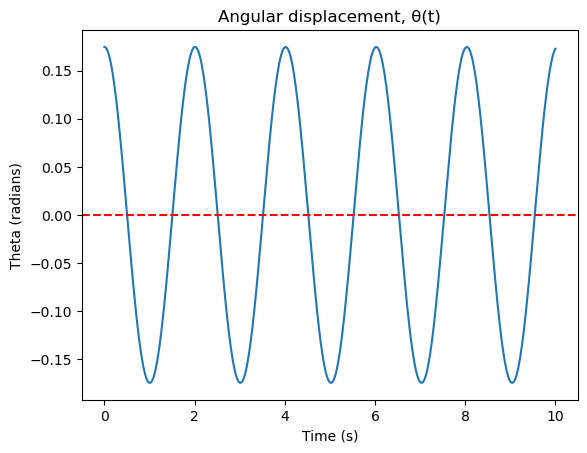

In [11]:
plt.plot(time_values, theta_values)
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Angular displacement, θ(t)")
plt.axhline(y=0, color = 'red', linestyle='--')
plt.show()

Print out the numerical period (what you calculated with scipy) to **four** significant digits.

In [12]:
print(round(T_numerical, 4))

2.004


Compare the results between the small-angle approximation and numerical calculation. How well does the approximation match the numerical result?

In [13]:
# The approximation is really good, there is only a .004 second difference for the period.

## 2 Using Curve_Fit with Covid-19 Data
Import `pandas` in the cell below.

In [14]:
import pandas as pd

Run the cell below. If that doesn't work, then just **paste** the link into a web browser and it should automatically download. Then you can put the `.csv` file in the same directory as this notebook.

In [15]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

With the `pandas` function `read_csv`, import the data in the cell below as a dataframe `df`.

In [16]:
df = pd.read_csv(url)

Select **United States** as the country and make a new data frame called `df_country` with only this information.

In [17]:
df_country = df[df["location"] == "United States"]

From your `df_country` dataframe, extract only the relevant columns: **"date"** and **"total_cases"**. 

*Hint: Use `.dropna()` to get rid of the other data.*

In your `df_country` dataframe, add a new column called **"days since start"** and covert the data to numerical days.

*Hint: You can just take the length of your dataframe (`range(len(df_country))`).*

In [18]:
df_country = df_country[["date", "total_cases"]]
df_country = df_country[df_country != 0].dropna() # using dropna didnt work but this did!
df_country["days since start"] = range(len(df_country))

Print the first few rows of your `df_country` dataframe.

In [19]:
print(df_country)

              date  total_cases  days since start
403472  2020-01-26          7.0                 0
403473  2020-01-27          7.0                 1
403474  2020-01-28          7.0                 2
403475  2020-01-29          7.0                 3
403476  2020-01-30          7.0                 4
...            ...          ...               ...
405120  2024-07-31  103436829.0              1648
405121  2024-08-01  103436829.0              1649
405122  2024-08-02  103436829.0              1650
405123  2024-08-03  103436829.0              1651
405124  2024-08-04  103436829.0              1652

[1653 rows x 3 columns]


In the cell below, import `curve_fit`. Make sure to have `numpy` imported in this notebook as well.

In [20]:
from scipy.optimize import curve_fit

### Some background:
At the beginning of an outbreak, the number of cases follows an exponential growth model:

$$
C(t) = C_0 e^{rt}
$$

where
* $C(t)$ = number of cases at time $t$.
* $C_0$ = initial number of cases.
* $r$ = growth rate.
* $t$ = time in days.

Write a **function** called `exponential_growth` that takes in arguments `t`, `C_0` and `r`. Return the function given above.

In [21]:
def exponential_growth(t, C_0, r):
    return C_0 * np.exp(r * t)

Make a new variable called `days` and another new variable called `cases`. To the `days` variable give it the first 30 rows (your column **"days_since_start"**) and to the `cases` variable give it the first 30 rows (your column **"total_cases"**).

In [22]:
days = df_country[df_country["days since start"] < 30]["days since start"]
cases = df_country[df_country["days since start"] < 30]["total_cases"]

With `curve_fit` fit the model. Give it the argument `p0 = [1, 0.1]`.

In [23]:
popt, pcov = curve_fit(exponential_growth, days, cases, p0 = [1, 0.1])

Extract the best-fit parameters from `popt`. Call them `C0_fit` and `r_fit`.

In [24]:
C0_fit, r_fit = popt

Print your variables `C0_fit` with **two** significant digits. Print your variables `r_fit` with **four** significant digits.

In [25]:
print(C0_fit.round(2))
print(r_fit.round(5))

5.9
0.06206


Make sure to have `matplotlib` imported. Make a variable called `future_days` give it a numpy range from `0` to `60`. We want to predict up to 60 days.

In [26]:
future_days = np.linspace(0, 60, 61)
print(future_days)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60.]


Make a variable called `predicted_cases` set it equal to your function `exponential_growth` with inputs being `future_days` and your `curve_fit` outputs. 

*Hint: You will want to use `*popt` as your `curve_fit` input.*

In [27]:
predicted_cases = exponential_growth(future_days, C0_fit, r_fit)

**Scater** the variable `cases` as a function of `days`. **Plot** the variable `future_days` as a function of `predicted_cases`. 

Don't forget a label for your x-axis, y-axis, title and legend.

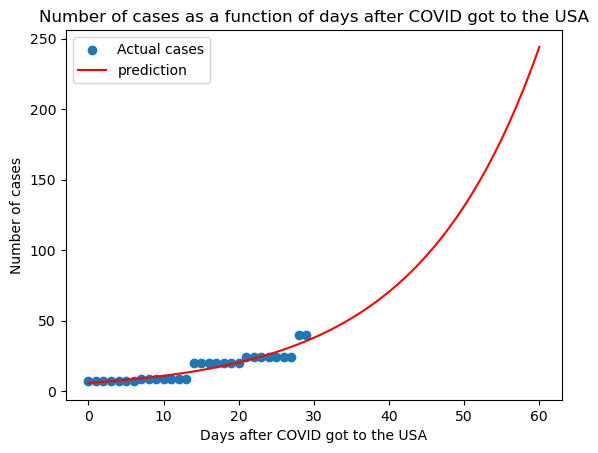

In [28]:
plt.scatter(days, cases, label = "Actual cases")
plt.plot(future_days, predicted_cases, label = "prediction", color="red")
plt.xlabel("Days after COVID got to the USA")
plt.ylabel("Number of cases")
plt.title("Number of cases as a function of days after COVID got to the USA")
plt.legend()
plt.show()

How well does your exponential model fit the actual COVID-19 data? 

In [29]:
# It actually fits the data quite nicely!

Make another plot but this time to **90 days**.

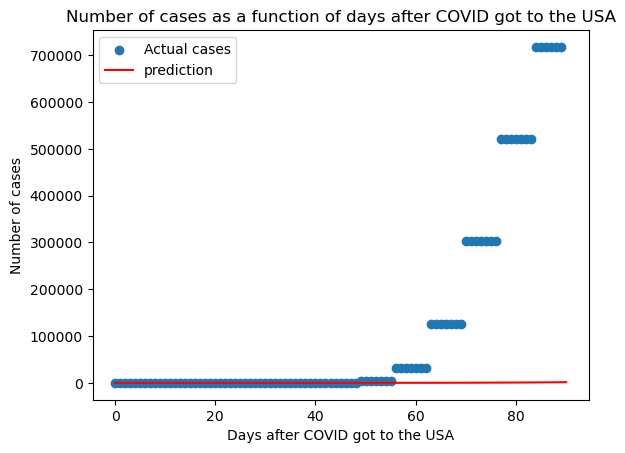

In [29]:
future_days = np.linspace(0, 90, 91)
predicted_cases = exponential_growth(future_days, C0_fit, r_fit)

days = df_country[df_country["days since start"] < 90]["days since start"]
cases = df_country[df_country["days since start"] < 90]["total_cases"]

plt.scatter(days, cases, label = "Actual cases")
plt.plot(future_days, predicted_cases, label = "prediction", color="red")
plt.xlabel("Days after COVID got to the USA")
plt.ylabel("Number of cases")
plt.title("Number of cases as a function of days after COVID got to the USA")
plt.legend()
plt.show()

What does your model predict the number of cases to be at 87 days? Print in the cell below.

In [31]:
print("Number of cases at 87 days:", round(predicted_cases[87]))

Number of cases at 87 days: 1304


## 3 Seaborn
Use Seaborn to visualize your data, NOT matplotlib. 
1) Go to this website and **pick a dataset that interest you**: https://github.com/mwaskom/seaborn-data
2) Go to this website for documentation: https://seaborn.pydata.org/index.html
3) Import seaborn data (*Hint: You can use the function `sns.load dataset()`. For example, `sns.load dataset('planets')`.*
4) Make a cool plot!
5) With `scipy` add a model to your data. (This can be a different plot.)

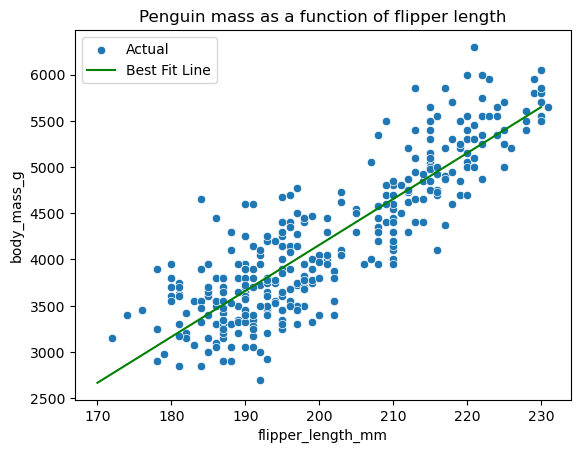

In [34]:
import seaborn as sns
dataset = sns.load_dataset("penguins")
cleaned_flipper_length = dataset["flipper_length_mm"].dropna()
cleaned_body_mass = dataset["body_mass_g"].dropna()

sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=dataset, label="Actual")


def linear_growth(x, m, b):
    return m * x + b
popt, pcov = curve_fit(linear_growth, cleaned_flipper_length, cleaned_body_mass)
m_fit, b_fit = popt

x_values = np.linspace(170, 230, 2)
y_values = linear_growth(x_values, m_fit, b_fit)
plt.plot(x_values, y_values, color = "green", label="Best Fit Line")
plt.title("Penguin mass as a function of flipper length")
plt.legend()
plt.show()

On it's own branch, submit this notebook to Gradescope! 